![](/home/ubuntu/CmsOpenData/AnalysisDesigner/datafiles/cms.png)
 
<p style="margin-right:8%; margin-left:8%; font-size:28px; font-weight: 200; line-height: 1.5em">
# Start an Analysis in Experimental Particle Physics (1) 

## From Basic Check of Muons to the Observation of the Production of Z Bosons

In this example you will learn: 

* How to use the ROOT "tree" structure of the information of particles in events measured in the CMS detector

* How to define and apply a selection criteria on the events collected using the information of the particles detected

* How to fill a histogram with the information selected and analyze the distribution of an observable

Let's start!

There is already a simplified NTuple version of the original data created to perform the following exercise and named **mytree.root**. It coints the minimum information to work with. If you need to include more information you can create your own NTuple by following the instructions under [Part0: create your own NTuple from the CMS Open Data.](https://cmsopendata.ifca.es/jupyter/notebooks/tutorials/Part0.V2.ipynb).


We have prepared a basic script that shows you how to make a loop to read the information of 
all the particles on these events and then perform a simple analysis: [**Analyzer_All.py**](https://cmsopendata.ifca.es/jupyter/edit/AnalysisDesigner/Analyzer_All.py). 

You can have a look to the code and understand what is done:

   * The class AnalyzerAll is inherited from the class [**Analyzer**](https://cmsopendata.ifca.es/jupyter/edit/AnalysisDesigner/Analyzer.py). 
   
   * For each event (collision) we read the information for all the muons reconstructed (if any) and stored in a [TTree](https://root.cern.ch/doc/master/classTTree.html) called *muons*.    
  
   * We store in a local variable all the information available for each muon: the momentum (pt, px, ..), geometrical coordinates (eta, phi) and all the variables needed for the identification and isolation.

   * We create different **histograms** in ROOT format [TH1F](https://root.cern.ch/doc/master/classTH1F.html) for all the variables associated to each muon and that can be shown as a **plot**.

   * We can also compute new observables, like the invariant mass of two muons, and also plot it.
   
The aim of this exercise is that you explore the muons detected in the events and also 
have a first look to see if some of these muons could come from the decay of a Z boson.

**NOTE:** 

For each exercise, you will need to import the **ROOT** package to run the code and you have to use our "default" area for analysis. 

For running the code under Jupyter you will need to Run each section marked with a number, or you can go to the upper menu and under Cell select **Run All** 

In [7]:
# Import ROOT (ROOT is a analysis package used to handle 
## the tree files, but also histograms, etc.)
import ROOT

In [8]:
cd /home/ubuntu/CmsOpenData/AnalysisDesigner

/home/ubuntu/CmsOpenData/AnalysisDesigner


* ### Run the Analysis for All muons
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">

Now we will perform the analysis for all muons, running the module [**Analyzer_All.py**](https://cmsopendata.ifca.es/jupyter/edit/AnalysisDesigner/Analyzer_All.py), and producing the histograms that are saved in a file **histos.root** that will be stored in the [**datafiles**](https://cmsopendata.ifca.es/jupyter/tree/Analyzer_Package/datafiles) folder.

Each histogram [TH1F](https://root.cern.ch/doc/master/classTH1F.html) is saved with a name started by *h_* followed by the *name of the kinematic variable* (---> aqui hay que poner la explicacion de las variables o algo.... veremos).

Following the steps describe before:         

In [9]:
# Import the main module which run the analysis for ALL particles
from Analyzer_All import AnalyzerAll

# Instance of AnalyzerAll
analysis = AnalyzerAll()


In [10]:
#Loop over events
#--------------------------------------------------------------------

#Specify the output file name
analysis.beginJob("histosAlicia.root")

print "Start the Analysis"

print "Running ................"

# For each event or entry, the following loop read all the tree branches,
# creates every muon and add it to all_muons list
for event in range(0, analysis.numEntries):
    analysis.process(event)
analysis.endJob()

print "Well done! analysis ended"


*** Begin job
Start the Analysis
Running ................
*** writing file <ROOT.TFile object ("datafiles/histosAlicia.root") at 0x543edb0>
*** done
Well done! analysis ended


* ### Check your h_histograms
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">

Open the **histos.root** file for reading and printing the list of histograms saved in it.

In [11]:
# Get the root file that contains the histograms for all muons: histos.root.
Hfile=ROOT.TFile("datafiles/histosAlicia.root", "read")

# List the histograms stored in the file
Hfile.ls()

TFile**		datafiles/histosAlicia.root	
 TFile*		datafiles/histosAlicia.root	
  KEY: TH1F	h_pt;1	Muons Transverse Momentun
  KEY: TH1F	h_px;1	Muons x- Momentun
  KEY: TH1F	h_py;1	Muons y- Momentun
  KEY: TH1F	h_pz;1	Muons z- Momentun
  KEY: TH1F	h_eta;1	Angle Transvese
  KEY: TH1F	h_energy;1	Muons Energy
  KEY: TH1F	h_dz;1	Distance from Primary vertex Z 
  KEY: TH1F	h_charge;1	Muons Charge
  KEY: TH1F	h_normChi2;1	Muons Chi2/ndof
  KEY: TH1F	h_numberOfValidHits;1	Number of Valid Hits
  KEY: TH1F	h_dB;1	Impact Parameter
  KEY: TH1F	h_isolation_sumPt;1	Tracker Isolation
  KEY: TH1F	h_isolation_emEt;1	ECAL Isolation
  KEY: TH1F	h_isolation_hadEt;1	HCAL Isolation
  KEY: TH1F	h_isolation;1	Relative Isolation
  KEY: TH1F	h_mass;1	MassInv


 * ### Learn the kinematic variables
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">

Here you have a set of varibles, used for muon identification and isolation, and the histogram name used to save them:

             - transverse momentum (in XY plane):                     'h_pt'
             - momentum X-coordinate px:                              'h_px'
             - momentum Y-coordinate py:                              'h_py'
             - momentum Z-coordinate pz:                              'h_pz' 
             - pseudorapidity eta (1):                                'h_eta'
             - energy:                                                'h_energy'
             - charge:                                                'h_charge'
             - distance between particle Z-coord and Primary Vertex:  'h_dz'
             - impact paremeter dB (in xy plane):                     'h_dB'
             - normalize Chi2/n.d.o.f.:                               'h_normChi2'
             - number of hits in the Tracker:                         'h_numberOfValidHits'
             - tracker isolation:                                     'h_isolation_sumPt'
             - electromagnetic caloremeter isolation:                 'h_isolation_emEt'
             - hadronic caloremeter isolation:                        'h_isolation_hadEt'    
             - relative isolation (2)                                 'h_isolation'
             - invariant mass:                                        'h_mass'


 (1) See [pseudorapitidy](https://en.wikipedia.org/wiki/Pseudorapidity) 
 
 (2) Relative isolation defined as: relIso = (sumPt+emEt+hadEt)/pt 

* ### Draw Histos
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">

Once you have created the file containing all the histograms, the next step is to plot each of the histogram, and study each varibale. Here, we detail some procedures 


<p style="margin-right:0%; margin-left:0%; font-size:15px; font-weight: 200; line-height: 1.2em">

**1.**         Create a ROOT [TCanvas](https://root.cern.ch/doc/master/classTCanvas.html) and draw the histogram on it. 

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: myCanvas


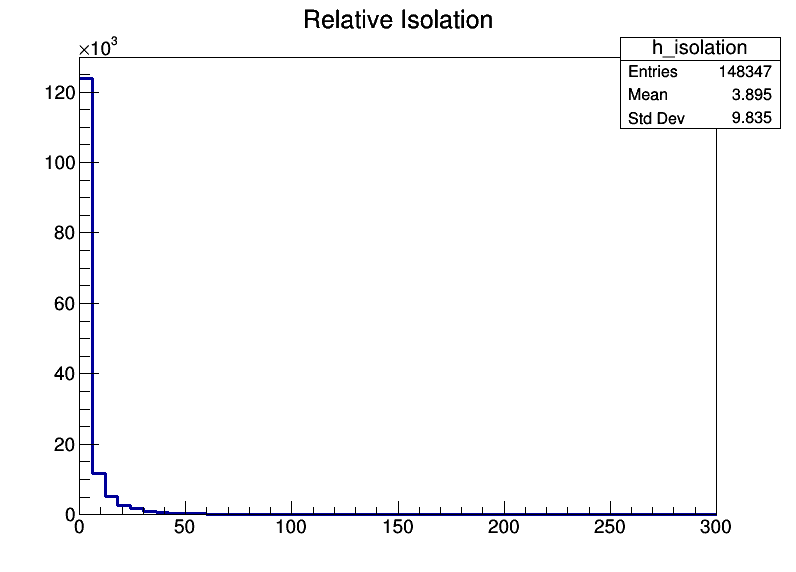

In [12]:
### Get the root file that contains the histograms for all muons: histos.root.
Hfile=ROOT.TFile("datafiles/histosAlicia.root", "read")

### You must create a variable to store the histogram selected.
histo1=Hfile.Get('h_isolation')

### First: Create the canvas where the histogram is going to be drawn
canvas = ROOT.TCanvas("myCanvas","All muons: pT",800,600)

### Second: Draw the histogram
histo1.Draw()

### Third : Draw the canvas
canvas.Draw()

**2.** Set your favorite configuration. 

Once you have created the variable where the histogram is stored, and after drawing it, you can customize the histogram and canvas options. 

References:

[Tcolor Class](https://root.cern.ch/doc/master/classTColor.html)

[Histogram Customization](https://root.cern.ch/doc/v606/classTHistPainter.html)

[Marker Atributtes such as color, size or style for histograms](https://root.cern.ch/doc/master/classTAttMarker.html)

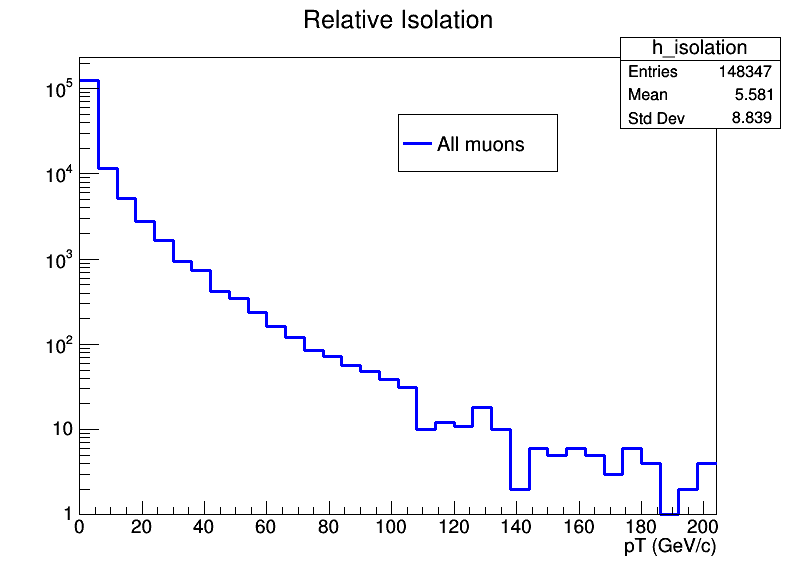

In [13]:
### Change the line color
histo1.SetLineColor(4)

### Change the bounds of the histograms for X Axis 
histo1.GetXaxis().SetRangeUser(0, 200);


### Wrote the X-axis label
histo1.GetXaxis().SetTitle("pT (GeV/c)");

### Change the bins for the histograms by diving by a divisor of the initial
# number of bins. 
## Note: To restore the binning you must to draw the histo again.
#histo1.Rebin(2)

### Create the legend. TLegend(x1, y1, x2, y2)
legend =ROOT.TLegend(0.7,0.8,0.50,0.7);
#legend.SetHeader("Title");
legend.AddEntry(histo1,"All muons","l");
#legend->AddEntry("gr","Graph with error bars","lep");
legend.Draw();

### Twist linear scale for Y axe to the logaritmic one with the function SetLogy.
canvas.SetLogy()

### Draw the histogram again and check your changes 
canvas.Draw()

**3.**         Save the image in a .png file. 

The previous procedure does not save the image automatically, it just shows you the picture. This statement can be written before or after stablish your favorite setting. Hence, you can collect both histograms for the analysis. 

All the .png files created are stored in the folder [output_histograms](https://cmsopendata.ifca.es/jupyter/tree/output_histograms)

In [14]:
# If you want keep it, you must type: 
# NOTE: Write the name of the file 

name = "pt"
canvas.SaveAs("../output_histograms/"+ name +".png")

# This save the last image as a .png file.

Info in <TCanvas::Print>: png file ../output_histograms/pt.png has been created


** 4.** And set again your preferences. ** PAY ATTENTION :** some settings are applied on the histo variable some others on the canvas.  